<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://tpq.io' target='_blank'>http://tpq.io</a>

**Contact us** | <a href='mailto:pff@tpq.io'>pff@tpq.io</a>

# Input-Output Operations

In [1]:
import seaborn as sns; sns.set()
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

## Basic I/O with Python

### Writing Objects to Disk

In [2]:
path = './data/'

In [3]:
import numpy as np
from random import gauss

In [4]:
a = [gauss(1.5, 2) for i in range(1000000)]
  # generation of normally distributed randoms

In [5]:
import pickle

In [6]:
pkl_file = open(path + 'data.pkl', 'wb')
  # open file for writing
  # Note: existing file might be overwritten

In [7]:
%time pickle.dump(a, pkl_file)

CPU times: user 31.3 ms, sys: 23.1 ms, total: 54.4 ms
Wall time: 56.6 ms


In [8]:
pkl_file

<_io.BufferedWriter name='./data/data.pkl'>

In [9]:
pkl_file.close()

In [10]:
ll $path*

-rw-r--r--  1 yves  staff   9002006 Jan  4 12:57 ./data/data.pkl
-rw-r--r--@ 1 yves  staff  48831941 Jan  4 12:56 ./data/numbs.csv


In [11]:
pkl_file = open(path + 'data.pkl', 'rb')  # open file for reading

In [12]:
%time b = pickle.load(pkl_file)

CPU times: user 44.9 ms, sys: 18.4 ms, total: 63.3 ms
Wall time: 62.9 ms


In [13]:
b[:5]

[0.7175243013795529,
 2.304498716019961,
 0.4273043841101807,
 1.3070334916904747,
 2.961209238091969]

In [14]:
a[:5]

[0.7175243013795529,
 2.304498716019961,
 0.4273043841101807,
 1.3070334916904747,
 2.961209238091969]

In [15]:
np.allclose(np.array(a), np.array(b))

True

In [16]:
np.sum(np.array(a) - np.array(b))

0.0

In [17]:
pkl_file = open(path + 'data.pkl', 'wb')  # open file for writing

In [18]:
%time pickle.dump(np.array(a), pkl_file)

CPU times: user 32.8 ms, sys: 8.48 ms, total: 41.3 ms
Wall time: 40.3 ms


In [19]:
%time pickle.dump(np.array(a) ** 2, pkl_file)

CPU times: user 32.8 ms, sys: 9.49 ms, total: 42.2 ms
Wall time: 42.9 ms


In [20]:
pkl_file.close()

In [21]:
ll $path*

-rw-r--r--@ 1 yves  staff  16000322 Jan  4 12:57 ./data/data.pkl
-rw-r--r--@ 1 yves  staff  48831941 Jan  4 12:56 ./data/numbs.csv


In [22]:
pkl_file = open(path + 'data.pkl', 'rb')  # open file for reading

In [23]:
x = pickle.load(pkl_file)
x

array([ 0.7175243 ,  2.30449872,  0.42730438, ...,  2.59679427,
        3.48396041, -0.70552468])

In [24]:
y = pickle.load(pkl_file)
y

array([  0.51484112,   5.31071433,   0.18258904, ...,   6.7433405 ,
        12.13798015,   0.49776507])

In [25]:
pkl_file.close()


In [26]:
pkl_file = open(path + 'data.pkl', 'wb')  # open file for writing
pickle.dump({'x' : x, 'y' : y}, pkl_file)
pkl_file.close()

In [27]:
pkl_file = open(path + 'data.pkl', 'rb')  # open file for writing
data = pickle.load(pkl_file)
pkl_file.close()
for key in data.keys():
    print(key, data[key][:4])

x [ 0.7175243   2.30449872  0.42730438  1.30703349]
y [ 0.51484112  5.31071433  0.18258904  1.70833655]


In [28]:
!rm -f $path*

### Reading and Writing Text Files

In [29]:
rows = 5000
a = np.random.standard_normal((rows, 5))  # dummy data

In [30]:
a.round(4)

array([[-0.8583,  1.2464,  0.275 ,  1.8268, -0.1792],
       [ 1.3884, -1.7723, -0.3494,  2.1323, -2.0661],
       [ 0.7387,  0.8774,  0.4039, -2.4789, -0.8312],
       ..., 
       [ 0.4529,  0.9715, -0.3893, -1.091 ,  0.251 ],
       [-0.2773, -1.2208, -0.8331,  0.2236,  0.9206],
       [ 0.7561, -0.4559, -0.137 , -1.4523, -0.3586]])

In [31]:
import pandas as pd
t = pd.date_range(start='2014/1/1', periods=rows, freq='H')
    # set of hourly datetime objects

In [32]:
t

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 01:00:00',
               '2014-01-01 02:00:00', '2014-01-01 03:00:00',
               '2014-01-01 04:00:00', '2014-01-01 05:00:00',
               '2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               ...
               '2014-07-27 22:00:00', '2014-07-27 23:00:00',
               '2014-07-28 00:00:00', '2014-07-28 01:00:00',
               '2014-07-28 02:00:00', '2014-07-28 03:00:00',
               '2014-07-28 04:00:00', '2014-07-28 05:00:00',
               '2014-07-28 06:00:00', '2014-07-28 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='H')

In [33]:
csv_file = open(path + 'data.csv', 'w')  # open file for writing

In [34]:
header = 'date,no1,no2,no3,no4,no5\n'
csv_file.write(header)

25

In [35]:
for t_, (no1, no2, no3, no4, no5) in zip(t, a):
    s = '%s,%f,%f,%f,%f,%f\n' % (t_, no1, no2, no3, no4, no5)
    csv_file.write(s)
csv_file.close()

In [36]:
ll $path*

-rw-r--r--@ 1 yves  staff  337533 Jan  4 12:57 ./data/data.csv


In [37]:
csv_file = open(path + 'data.csv', 'r')  # open file for reading

In [38]:
for i in range(5):
    print(csv_file.readline(), end='')

date,no1,no2,no3,no4,no5
2014-01-01 00:00:00,-0.858294,1.246377,0.274983,1.826831,-0.179228
2014-01-01 01:00:00,1.388449,-1.772316,-0.349384,2.132293,-2.066150
2014-01-01 02:00:00,0.738693,0.877389,0.403922,-2.478926,-0.831177
2014-01-01 03:00:00,0.942433,3.154156,-1.763526,-0.141025,1.719043


In [39]:
csv_file = open(path + 'data.csv', 'r')
content = csv_file.readlines()
for line in content[:5]:
    print(line, end='')

date,no1,no2,no3,no4,no5
2014-01-01 00:00:00,-0.858294,1.246377,0.274983,1.826831,-0.179228
2014-01-01 01:00:00,1.388449,-1.772316,-0.349384,2.132293,-2.066150
2014-01-01 02:00:00,0.738693,0.877389,0.403922,-2.478926,-0.831177
2014-01-01 03:00:00,0.942433,3.154156,-1.763526,-0.141025,1.719043


In [40]:
csv_file.close()
!rm -f $path*

### SQL Databases

In [41]:
import sqlite3 as sq3

In [42]:
query = 'CREATE TABLE numbs (Date date, No1 real, No2 real)'

In [43]:
con = sq3.connect(path + 'numbs.db')

In [44]:
con.execute(query)

In [45]:
con.commit()

In [46]:
import datetime as dt

In [47]:
con.execute('INSERT INTO numbs VALUES(?, ?, ?)',
            (dt.datetime.now(), 0.12, 7.3))

In [48]:
data = np.random.standard_normal((10000, 2)).round(5)

In [49]:
for row in data:
    con.execute('INSERT INTO numbs VALUES(?, ?, ?)',
                (dt.datetime.now(), row[0], row[1]))
con.commit()

In [50]:
con.execute('SELECT * FROM numbs').fetchmany(10)

[('2017-01-04 12:57:28.707643', 0.12, 7.3),
 ('2017-01-04 12:57:28.718788', -1.23226, -0.71997),
 ('2017-01-04 12:57:28.718902', -0.12128, -0.2456),
 ('2017-01-04 12:57:28.719075', 0.11222, 0.89221),
 ('2017-01-04 12:57:28.719109', 0.67232, 0.20878),
 ('2017-01-04 12:57:28.719240', -0.32157, 0.96173),
 ('2017-01-04 12:57:28.719449', 1.25808, 0.28171),
 ('2017-01-04 12:57:28.719567', 0.26526, -1.62108),
 ('2017-01-04 12:57:28.719700', -0.45476, 0.45904),
 ('2017-01-04 12:57:28.719787', 1.37294, -0.47923)]

In [51]:
pointer = con.execute('SELECT * FROM numbs')

In [52]:
for i in range(3):
    print(pointer.fetchone())

('2017-01-04 12:57:28.707643', 0.12, 7.3)
('2017-01-04 12:57:28.718788', -1.23226, -0.71997)
('2017-01-04 12:57:28.718902', -0.12128, -0.2456)


In [53]:
con.close()
!rm -f $path*

### Writing and Reading Numpy Arrays

In [54]:
import numpy as np

In [55]:
dtimes = np.arange('2015-01-01 10:00:00', '2021-12-31 22:00:00',
                  dtype='datetime64[m]')  # minute intervals
len(dtimes)

3681360

In [56]:
dty = np.dtype([('Date', 'datetime64[m]'), ('No1', 'f'), ('No2', 'f')])
data = np.zeros(len(dtimes), dtype=dty)

In [57]:
data['Date'] = dtimes

In [58]:
a = np.random.standard_normal((len(dtimes), 2)).round(5)
data['No1'] = a[:, 0]
data['No2'] = a[:, 1]

In [59]:
%time np.save(path + 'array', data)  # suffix .npy is added

CPU times: user 2.79 ms, sys: 59.5 ms, total: 62.3 ms
Wall time: 74.4 ms


In [60]:
ll $path*

-rw-r--r--@ 1 yves  staff  58901888 Jan  4 12:57 ./data/array.npy


In [61]:
%time np.load(path + 'array.npy')

CPU times: user 1.05 ms, sys: 38.6 ms, total: 39.6 ms
Wall time: 38.7 ms


array([ (datetime.datetime(2015, 1, 1, 10, 0), 0.7476099729537964, 1.6913700103759766),
       (datetime.datetime(2015, 1, 1, 10, 1), -1.4012500047683716, 0.03612000122666359),
       (datetime.datetime(2015, 1, 1, 10, 2), -0.08098000288009644, 1.5686399936676025),
       ...,
       (datetime.datetime(2021, 12, 31, 21, 57), -0.7473999857902527, -0.6037999987602234),
       (datetime.datetime(2021, 12, 31, 21, 58), -0.6565999984741211, -0.3407999873161316),
       (datetime.datetime(2021, 12, 31, 21, 59), -0.22176000475883484, 0.1458899974822998)], 
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [62]:
data = np.random.standard_normal((10000, 6000))

In [63]:
%time np.save(path + 'array', data) 

CPU times: user 15.4 ms, sys: 510 ms, total: 525 ms
Wall time: 601 ms


In [64]:
ll $path*

-rw-r--r--@ 1 yves  staff  480000080 Jan  4 12:57 ./data/array.npy


In [65]:
%time np.load(path + 'array.npy')

CPU times: user 1.07 ms, sys: 274 ms, total: 276 ms
Wall time: 275 ms


array([[ 0.44120546, -1.42948436,  0.6453525 , ..., -2.01374765,
        -0.43302842, -0.54302582],
       [-1.08412749, -0.43242339,  0.6250064 , ..., -0.82544738,
         0.33295727,  0.48912054],
       [ 1.02311248,  0.00956891,  1.31212315, ..., -0.03879496,
         0.90253917, -0.63606442],
       ..., 
       [-0.32679487, -0.68413023,  1.54594018, ..., -0.34897777,
        -1.14763425,  0.57287878],
       [ 1.25083003,  0.07420539,  0.42632174, ..., -1.63087402,
        -1.22643541,  0.96375235],
       [ 0.65207823, -1.22148677, -0.55621649, ..., -0.88378821,
        -0.05834834,  0.55454979]])

In [66]:
data = 0.0
!rm -f $path*

## I/O with pandas

In [67]:
import numpy as np
import pandas as pd
data = np.random.standard_normal((1000000, 5)).round(5)
        # sample data set

In [68]:
filename = path + 'numbs'

### SQL Database

In [69]:
import sqlite3 as sq3

In [70]:
query = 'CREATE TABLE numbers (No1 real, No2 real,\
        No3 real, No4 real, No5 real)'

In [71]:
con = sq3.Connection(filename + '.db')

In [72]:
con.execute(query)

In [73]:
%%time
con.executemany('INSERT INTO numbers VALUES (?, ?, ?, ?, ?)', data)
con.commit()

CPU times: user 9.84 s, sys: 151 ms, total: 9.99 s
Wall time: 10.1 s


In [74]:
ll $path*

-rw-r--r--@ 1 yves  staff  52633600 Jan  4 12:57 ./data/numbs.db


In [75]:
%%time
temp = con.execute('SELECT * FROM numbers').fetchall()
print(temp[:2])
temp = 0.0

[(2.13288, 0.87434, -1.50824, -0.56057, 0.89629), (-0.67107, -0.23454, -0.77858, -2.3218, 1.29744)]
CPU times: user 2 s, sys: 143 ms, total: 2.14 s
Wall time: 2.15 s


In [76]:
%%time
query = 'SELECT * FROM numbers WHERE No1 > 0 AND No2 < 0'
res = np.array(con.execute(query).fetchall()).round(3)

CPU times: user 785 ms, sys: 49.4 ms, total: 835 ms
Wall time: 836 ms


(-4.5, 0.5)

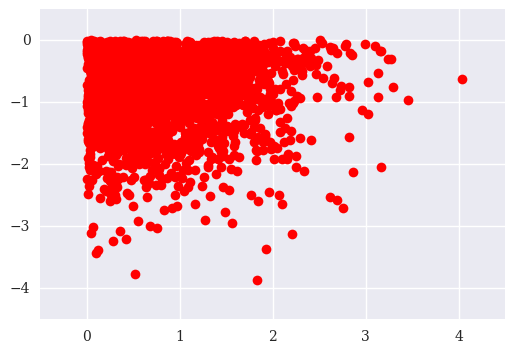

In [77]:
res = res[::100]  # every 100th result
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(res[:, 0], res[:, 1], 'ro')
plt.grid(True); plt.xlim(-0.5, 4.5); plt.ylim(-4.5, 0.5)
# tag: scatter_query
# title: Plot of the query result
# size: 60

### From SQL to pandas

In [78]:
import pandas.io.sql as pds

In [79]:
%time data = pds.read_sql('SELECT * FROM numbers', con)

CPU times: user 2.36 s, sys: 175 ms, total: 2.53 s
Wall time: 2.54 s


In [80]:
data.head()

,No1,No2,No3,No4,No5
0,2.13288,0.87434,-1.50824,-0.56057,0.89629
1,-0.67107,-0.23454,-0.77858,-2.32180,1.29744
2,-0.44240,-0.80390,-0.01931,-0.19937,0.09259
3,-1.48760,-0.31787,-0.46893,1.42633,-1.26587
4,-0.76352,1.49063,0.28090,1.94881,0.05093


In [81]:
%time data[(data['No1'] > 0) & (data['No2'] < 0)].head()

CPU times: user 15.2 ms, sys: 7.39 ms, total: 22.5 ms
Wall time: 22.1 ms


,No1,No2,No3,No4,No5
8,0.64734,-2.52218,-1.25792,0.59523,-0.09090
12,0.12658,-0.40811,-0.70102,1.30588,0.78281
16,0.16651,-0.19574,2.26994,-0.00297,0.36734
22,1.90272,-0.40805,-0.13164,0.34268,0.08017
25,0.41848,-0.06240,1.27040,0.83622,0.74480


In [82]:
%%time
res = data[['No1', 'No2']][((data['No1'] > 0.5) | (data['No1'] < -0.5))
                     & ((data['No2'] < -1) | (data['No2'] > 1))]

CPU times: user 15.7 ms, sys: 7.05 ms, total: 22.8 ms
Wall time: 22 ms


(-4.7991400000000004, 4.7057799999999999, -5.0514700000000001, 5.19564)

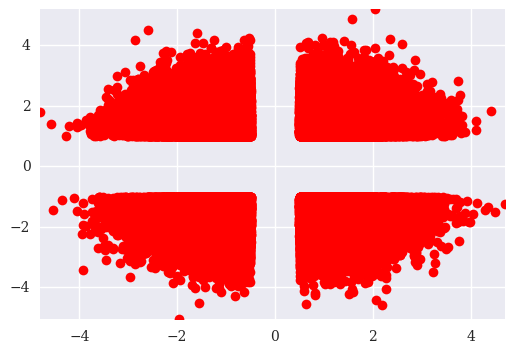

In [83]:
plt.plot(res.No1, res.No2, 'ro')
plt.grid(True); plt.axis('tight')
# tag: data_scatter_1
# title: Scatter plot of complex query results
# size: 55

In [84]:
h5s = pd.HDFStore(filename + '.h5s', 'w')

In [85]:
%time h5s['data'] = data

CPU times: user 35.9 ms, sys: 43.8 ms, total: 79.7 ms
Wall time: 91.8 ms


In [86]:
h5s

<class 'pandas.io.pytables.HDFStore'>
File path: ./data/numbs.h5s
/data            frame        (shape->[1000000,5])

In [87]:
h5s.close()

In [88]:
%%time
h5s = pd.HDFStore(filename + '.h5s', 'r')
temp = h5s['data']
h5s.close()

CPU times: user 6.32 ms, sys: 17.9 ms, total: 24.2 ms
Wall time: 22.7 ms


In [89]:
np.allclose(np.array(temp), np.array(data))

True

In [90]:
temp = 0.0

In [91]:
ll $path*

-rw-r--r--@ 1 yves  staff  52633600 Jan  4 12:57 ./data/numbs.db
-rw-r--r--@ 1 yves  staff  48007192 Jan  4 12:57 ./data/numbs.h5s


### Data as CSV File

In [92]:
%time data.to_csv(filename + '.csv')

CPU times: user 6.24 s, sys: 230 ms, total: 6.47 s
Wall time: 6.51 s


In [93]:
ls data/

numbs.csv  numbs.db   numbs.h5s


CPU times: user 1.29 s, sys: 139 ms, total: 1.43 s
Wall time: 1.43 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117634198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117784048>]], dtype=object)

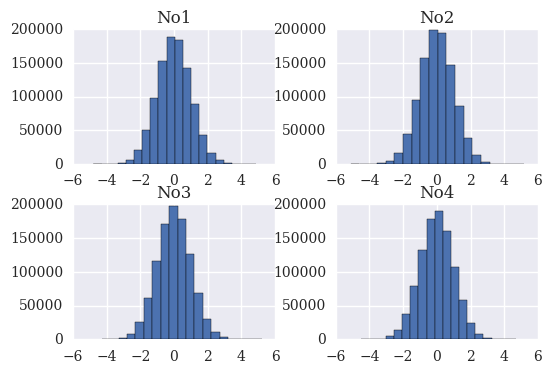

In [94]:
%%time
pd.read_csv(filename + '.csv')[['No1', 'No2',
                                'No3', 'No4']].hist(bins=20)
# tag: data_hist_3
# title: Histogram of 4 data sets
# size: 60

### Data as Excel File

In [95]:
%time data[:100000].to_excel(filename + '.xlsx')

CPU times: user 12.1 s, sys: 241 ms, total: 12.3 s
Wall time: 12.4 s


CPU times: user 7.64 s, sys: 97.7 ms, total: 7.74 s
Wall time: 7.78 s


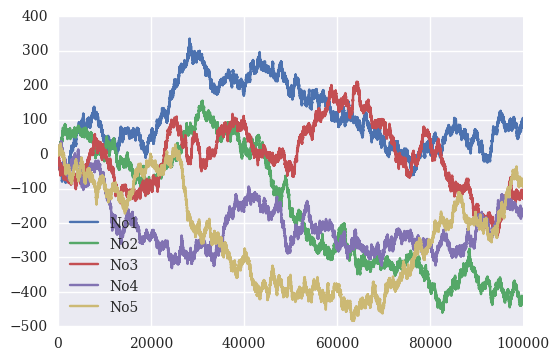

In [96]:
%time pd.read_excel(filename + '.xlsx', 'Sheet1').cumsum().plot()
# tag: data_paths
# title: Paths of random data from Excel file
# size: 60

In [97]:
ll $path*

-rw-r--r--@ 1 yves  staff  48835523 Jan  4 12:57 ./data/numbs.csv
-rw-r--r--@ 1 yves  staff  52633600 Jan  4 12:57 ./data/numbs.db
-rw-r--r--@ 1 yves  staff  48007192 Jan  4 12:57 ./data/numbs.h5s
-rw-r--r--@ 1 yves  staff   4418475 Jan  4 12:58 ./data/numbs.xlsx


In [98]:
rm -f $path*

## Fast I/O with PyTables

In [99]:
import numpy as np
import tables as tb
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

### Working with Tables

In [100]:
filename = path + 'tab.h5'
h5 = tb.open_file(filename, 'w') 

In [101]:
rows = 2000000

In [102]:
row_des = {
    'Date': tb.StringCol(26, pos=1),
    'No1': tb.IntCol(pos=2),
    'No2': tb.IntCol(pos=3),
    'No3': tb.Float64Col(pos=4),
    'No4': tb.Float64Col(pos=5)
    }

In [103]:
filters = tb.Filters(complevel=0)  # no compression
tab = h5.create_table('/', 'ints_floats', row_des,
                      title='Integers and Floats',
                      expectedrows=rows, filters=filters)

In [104]:
tab

/ints_floats (Table(0,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [105]:
pointer = tab.row

In [106]:
ran_int = np.random.randint(0, 10000, size=(rows, 2))
ran_flo = np.random.standard_normal((rows, 2)).round(5)

In [107]:
%%time
for i in range(rows):
    pointer['Date'] = dt.datetime.now()
    pointer['No1'] = ran_int[i, 0]
    pointer['No2'] = ran_int[i, 1] 
    pointer['No3'] = ran_flo[i, 0]
    pointer['No4'] = ran_flo[i, 1] 
    pointer.append()
      # this appends the data and
      # moves the pointer one row forward
tab.flush()

CPU times: user 7.68 s, sys: 115 ms, total: 7.79 s
Wall time: 7.83 s


In [108]:
tab

/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [109]:
ll $path*

-rw-r--r--@ 1 yves  staff  100156248 Jan  4 12:58 ./data/tab.h5


In [110]:
dty = np.dtype([('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'),
                                 ('No3', '<f8'), ('No4', '<f8')])
sarray = np.zeros(len(ran_int), dtype=dty)

In [111]:
sarray

array([(b'', 0, 0, 0.0, 0.0), (b'', 0, 0, 0.0, 0.0), (b'', 0, 0, 0.0, 0.0),
       ..., (b'', 0, 0, 0.0, 0.0), (b'', 0, 0, 0.0, 0.0),
       (b'', 0, 0, 0.0, 0.0)], 
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [112]:
%%time
sarray['Date'] = dt.datetime.now()
sarray['No1'] = ran_int[:, 0]
sarray['No2'] = ran_int[:, 1]
sarray['No3'] = ran_flo[:, 0]
sarray['No4'] = ran_flo[:, 1]

CPU times: user 72.5 ms, sys: 24.4 ms, total: 97 ms
Wall time: 96.5 ms


In [113]:
%%time
h5.create_table('/', 'ints_floats_from_array', sarray,
                      title='Integers and Floats',
                      expectedrows=rows, filters=filters)

CPU times: user 22 ms, sys: 29.7 ms, total: 51.6 ms
Wall time: 51.8 ms


/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [114]:
h5

File(filename=./data/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)
/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [115]:
h5.remove_node('/', 'ints_floats_from_array')

In [116]:
tab[:3]

array([(b'2017-01-04 12:58:23.256432', 675, 5035, -0.65922, 1.30184),
       (b'2017-01-04 12:58:23.256479', 9724, 3398, 1.30169, 0.16115),
       (b'2017-01-04 12:58:23.256485', 7222, 7318, -0.0731, 0.84687)], 
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [117]:
tab[:4]['No4']

array([ 1.30184,  0.16115,  0.84687, -0.44617])

In [118]:
%time np.sum(tab[:]['No3'])

CPU times: user 32.5 ms, sys: 52.5 ms, total: 85 ms
Wall time: 84 ms


512.849729999999

In [119]:
%time np.sum(np.sqrt(tab[:]['No1']))

CPU times: user 34.9 ms, sys: 42.5 ms, total: 77.4 ms
Wall time: 76.5 ms


133332520.5383914

2000000
CPU times: user 173 ms, sys: 93.1 ms, total: 266 ms
Wall time: 265 ms


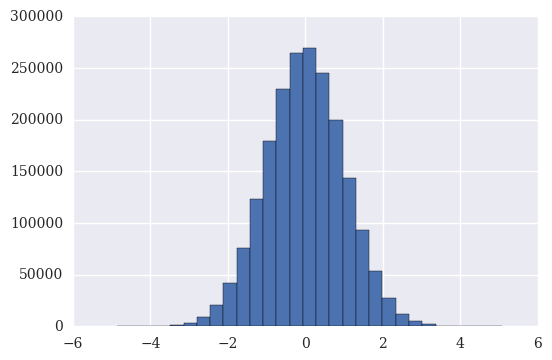

In [120]:
%%time
plt.hist(tab[:]['No3'], bins=30)
plt.grid(True)
print(len(tab[:]['No3']))
# tag: data_hist
# title: Histogram of data
# size: 60

In [121]:
%%time
res = np.array([(row['No3'], row['No4']) for row in
        tab.where('((No3 < -0.5) | (No3 > 0.5)) \
                 & ((No4 < -1) | (No4 > 1))')])[::100]

CPU times: user 288 ms, sys: 83.4 ms, total: 371 ms
Wall time: 320 ms


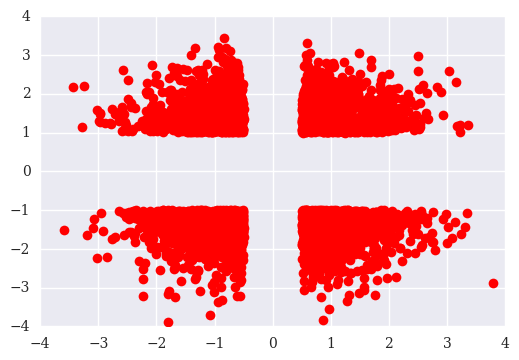

In [122]:
plt.plot(res.T[0], res.T[1], 'ro')
plt.grid(True)
# tag: scatter_data
# title: Scatter plot of query result
# size: 70

In [123]:
%%time
values = tab.cols.No3[:]
print("Max %18.3f" % values.max())
print("Ave %18.3f" % values.mean())
print("Min %18.3f" % values.min())
print("Std %18.3f" % values.std())

Max              5.066
Ave              0.000
Min             -5.195
Std              1.001
CPU times: user 27.6 ms, sys: 31.9 ms, total: 59.5 ms
Wall time: 58.4 ms


In [124]:
%%time
results = [(row['No1'], row['No2']) for row in
           tab.where('((No1 > 9800) | (No1 < 200)) \
                    & ((No2 > 4500) & (No2 < 5500))')]
for res in results[:4]:
    print(res)

(9844, 5437)
(9960, 4794)
(31, 4995)
(75, 5296)
CPU times: user 52 ms, sys: 46.2 ms, total: 98.1 ms
Wall time: 55.2 ms


In [125]:
%%time
results = [(row['No1'], row['No2']) for row in
           tab.where('(No1 == 1234) & (No2 > 9776)')]
for res in results:
    print(res)

(1234, 9927)
(1234, 9899)
(1234, 9973)
(1234, 9803)
(1234, 9834)
(1234, 9785)
CPU times: user 27.7 ms, sys: 45.7 ms, total: 73.4 ms
Wall time: 47.3 ms


### Working with Compressed Tables

In [126]:
filename = path + 'tab.h5c'
h5c = tb.open_file(filename, 'w') 

In [127]:
filters = tb.Filters(complevel=4, complib='blosc')

In [128]:
tabc = h5c.create_table('/', 'ints_floats', sarray,
                        title='Integers and Floats',
                      expectedrows=rows, filters=filters)

In [129]:
%%time
res = np.array([(row['No3'], row['No4']) for row in
             tabc.where('((No3 < -0.5) | (No3 > 0.5)) \
                       & ((No4 < -1) | (No4 > 1))')])[::100]

CPU times: user 285 ms, sys: 75 ms, total: 360 ms
Wall time: 304 ms


In [130]:
%time arr_non = tab.read()

CPU times: user 24.4 ms, sys: 44.1 ms, total: 68.5 ms
Wall time: 67.9 ms


In [131]:
%time arr_com = tabc.read()

CPU times: user 24 ms, sys: 43.1 ms, total: 67.1 ms
Wall time: 66.3 ms


In [132]:
ll $path*

-rw-r--r--@ 1 yves  staff  200312336 Jan  4 12:58 ./data/tab.h5
-rw-r--r--@ 1 yves  staff  100030836 Jan  4 12:58 ./data/tab.h5c


In [133]:
h5c.close()

### Working with Arrays

In [134]:
%%time
arr_int = h5.create_array('/', 'integers', ran_int)
arr_flo = h5.create_array('/', 'floats', ran_flo)

CPU times: user 1.42 ms, sys: 19.9 ms, total: 21.4 ms
Wall time: 24.1 ms


In [135]:
h5

File(filename=./data/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/floats (Array(2000000, 2)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/integers (Array(2000000, 2)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [136]:
ll $path*

-rw-r--r--@ 1 yves  staff  262344490 Jan  4 12:58 ./data/tab.h5
-rw-r--r--@ 1 yves  staff  100030836 Jan  4 12:58 ./data/tab.h5c


In [137]:
h5.close()

In [138]:
!rm -f $path*

### Out-of-Memory Computations

In [139]:
filename = path + 'array.h5'
h5 = tb.open_file(filename, 'w') 

In [140]:
n = 100
ear = h5.create_earray(h5.root, 'ear',
                      atom=tb.Float64Atom(),
                      shape=(0, n))

In [141]:
%%time
rand = np.random.standard_normal((n, n))
for i in range(750):
    ear.append(rand)
ear.flush()

CPU times: user 30.1 ms, sys: 27.4 ms, total: 57.5 ms
Wall time: 57 ms


In [142]:
ear

/ear (EArray(75000, 100)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (81, 100)

In [143]:
ear.size_on_disk

60004800

In [144]:
out = h5.create_earray(h5.root, 'out',
                      atom=tb.Float64Atom(),
                      shape=(0, n))

In [145]:
expr = tb.Expr('3 * sin(ear) + sqrt(abs(ear))')
  # the numerical expression as a string object
expr.set_output(out, append_mode=True)
  # target to store results is disk-based array

In [146]:
%time expr.eval()
  # evaluation of the numerical expression
  # and storage of results in disk-based array

CPU times: user 108 ms, sys: 51.7 ms, total: 159 ms
Wall time: 71.9 ms


/out (EArray(75000, 100)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (81, 100)

In [147]:
out[0, :10]

array([-0.19010891,  1.69424851,  3.42063696,  1.07565583,  2.1522075 ,
       -1.70390263, -1.72666511,  3.64561908,  3.48170578,  4.27455621])

In [148]:
%time imarray = ear.read()
  # read whole array into memory

CPU times: user 17.1 ms, sys: 26.6 ms, total: 43.6 ms
Wall time: 43.2 ms


In [149]:
import numexpr as ne
expr = '3 * sin(imarray) + sqrt(abs(imarray))'

In [150]:
ne.set_num_threads(16)
%time ne.evaluate(expr)[0, :10]

CPU times: user 94 ms, sys: 71.2 ms, total: 165 ms
Wall time: 25.9 ms


array([-0.19010891,  1.69424851,  3.42063696,  1.07565583,  2.1522075 ,
       -1.70390263, -1.72666511,  3.64561908,  3.48170578,  4.27455621])

In [151]:
h5.close()

In [152]:
!rm -f $path*

## Conclusions

## Further Reading

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>

**Python Training** |
<a href="http://training.tpq.io" target="_blank">Python for Finance University Certificate</a>